In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

/tmp/ipykernel_10433/2691490471.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('races.csv')
df = df[df.team1.str.startswith('Wild')]
df = df.replace('unknown', np.nan)
df.shape

(1113, 21)

In [3]:
df_dogs = pd.read_csv('dogs_stats.csv')
df_dogs.head()

,name,trainer,breed,sex,neutered,birth,ulna_length,jump_height,age,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time,good_runs,run_ins,run_outside,wrong_start_ratio,wrong_change_ratio,run_in_ratio,run_outside_ratio,avg_start,avg_change,avg_time
0,Dexter,TM800418,Kooikerhondje,M,Y,2010-02-14,14.05,25.0,13.887671,80,3,30,3.630,5,42,12.89,363.17,79,0,1,3.75,6.250000,0.000000,1.250000,0.121000,0.306905,4.597089
1,Jasper,NP950613,Border Collie,M,Y,2011-03-28,16.56,30.0,12.772603,40,0,9,3.120,3,28,12.50,220.56,37,0,3,0.00,7.500000,0.000000,7.500000,0.346667,0.446429,5.961081
2,Angie,UF830429,Border Collie,F,Y,2014-02-06,15.22,27.5,9.906849,33,0,4,0.390,3,26,19.12,177.42,31,1,1,0.00,9.090909,3.030303,3.030303,0.097500,0.735385,5.723226
3,Alex,ZE801127,Border Collie,M,Y,2014-04-22,17.95,32.5,9.701370,130,0,16,1.568,6,108,19.14,551.22,129,0,1,0.00,4.615385,0.000000,0.769231,0.098000,0.177222,4.273023
4,Ashley,DP910919,Border Collie,F,Y,2015-01-26,18.30,32.5,8.936986,63,0,0,0.000,3,60,31.16,265.63,62,1,0,0.00,4.761905,1.587302,0.000000,NaN,0.519333,4.284355


## Best breeds

Take these charts with care! There are many Border Collies in the input data, while many other breeds are represented by a single dog.

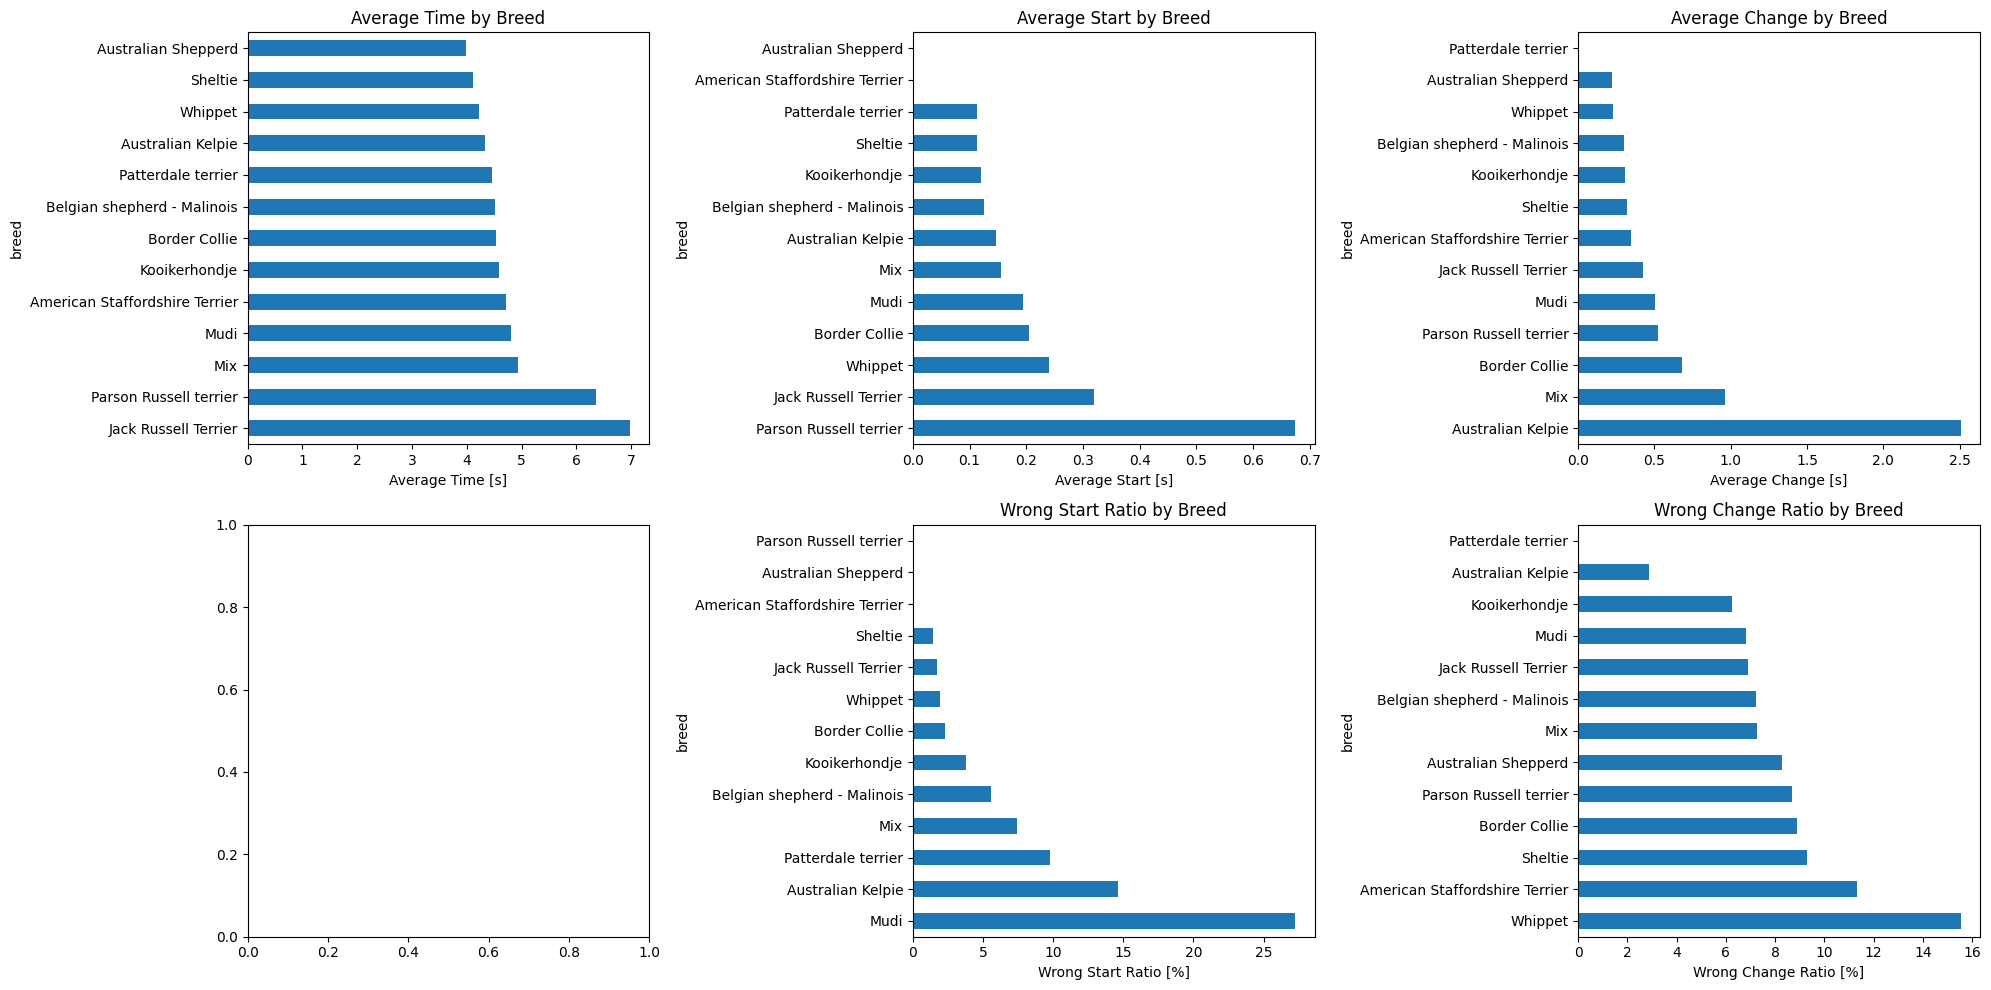

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

df_dogs.groupby('breed')['avg_time'].mean().sort_values(ascending=False).plot.barh(ax=axs[0, 0])
axs[0, 0].set_title('Average Time by Breed')
axs[0, 0].set_xlabel('Average Time [s]')

df_dogs.groupby('breed')['avg_start'].mean().sort_values(ascending=False).plot.barh(ax=axs[0, 1])
axs[0, 1].set_title('Average Start by Breed')
axs[0, 1].set_xlabel('Average Start [s]')

df_dogs.groupby('breed')['avg_change'].mean().sort_values(ascending=False).plot.barh(ax=axs[0, 2])
axs[0, 2].set_title('Average Change by Breed')
axs[0, 2].set_xlabel('Average Change [s]')

df_dogs.groupby('breed')['wrong_start_ratio'].mean().sort_values(ascending=False).plot.barh(ax=axs[1, 1])
axs[1, 1].set_title('Wrong Start Ratio by Breed')
axs[1, 1].set_xlabel('Wrong Start Ratio [%]')

df_dogs.groupby('breed')['wrong_change_ratio'].mean().sort_values(ascending=False).plot.barh(ax=axs[1, 2])
axs[1, 2].set_title('Wrong Change Ratio by Breed')
axs[1, 2].set_xlabel('Wrong Change Ratio [%]')

plt.tight_layout()
plt.show()

## Female dogs are better in change

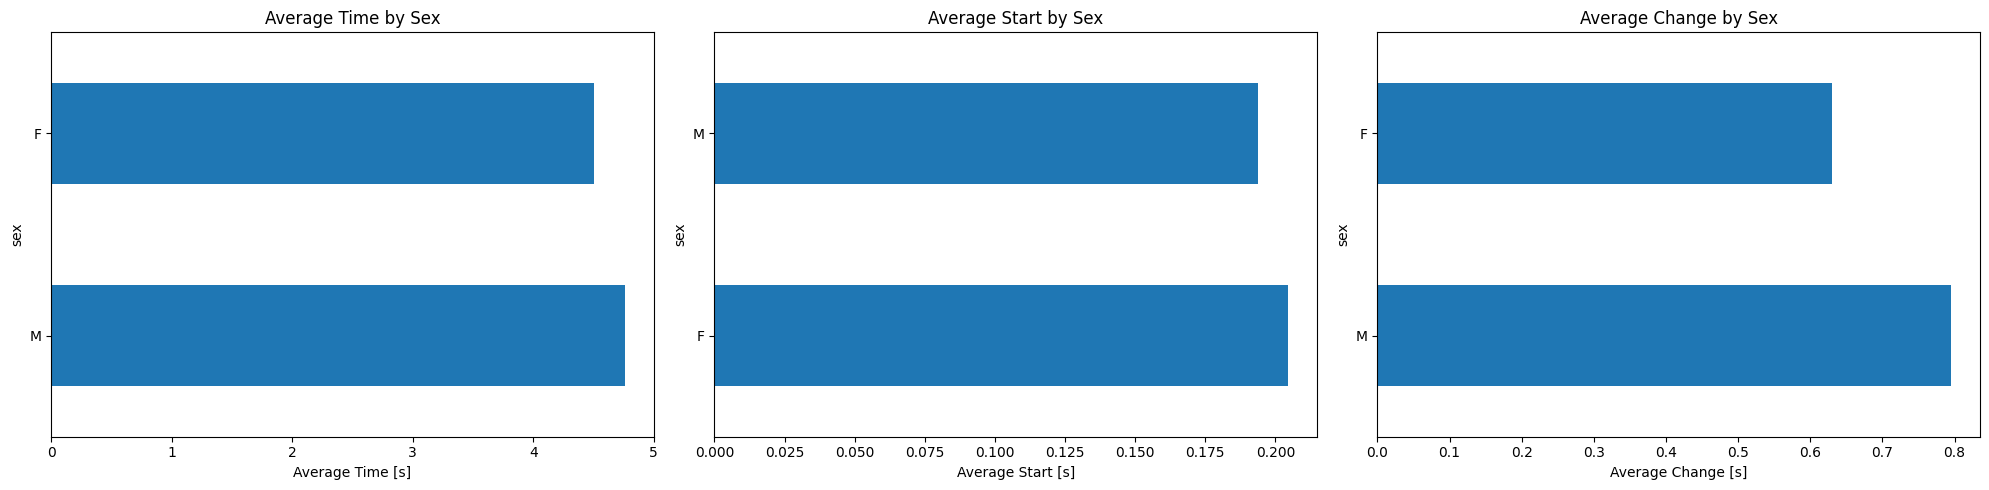

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

df_dogs.groupby('sex')['avg_time'].mean().sort_values(ascending=False).plot.barh(ax=axs[0])
axs[0].set_title('Average Time by Sex')
axs[0].set_xlabel('Average Time [s]')

df_dogs.groupby('sex')['avg_start'].mean().sort_values(ascending=False).plot.barh(ax=axs[1])
axs[1].set_title('Average Start by Sex')
axs[1].set_xlabel('Average Start [s]')

df_dogs.groupby('sex')['avg_change'].mean().sort_values(ascending=False).plot.barh(ax=axs[2])
axs[2].set_title('Average Change by Sex')
axs[2].set_xlabel('Average Change [s]')

plt.tight_layout()
plt.show()

## Neutered dogs are better in change

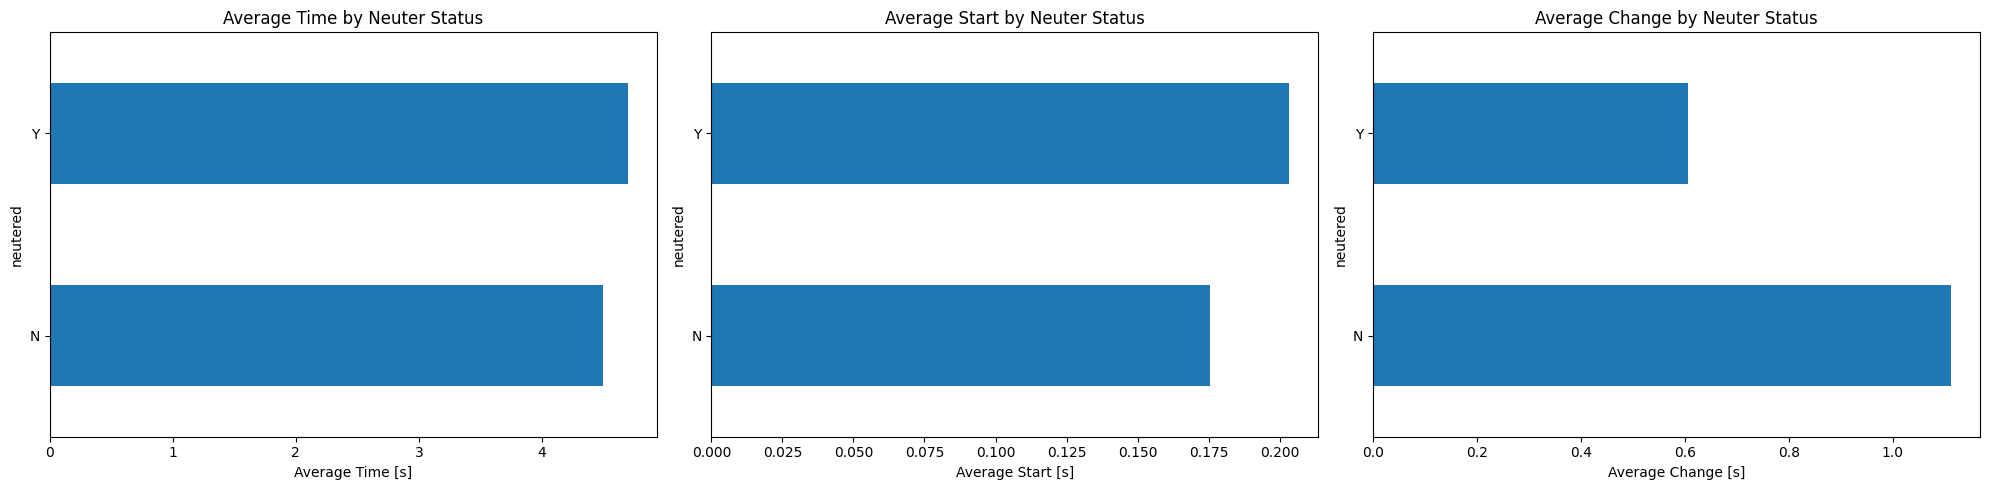

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

df_dogs.groupby('neutered')['avg_time'].mean().plot.barh(ax=axs[0])
axs[0].set_title('Average Time by Neuter Status')
axs[0].set_xlabel('Average Time [s]')

df_dogs.groupby('neutered')['avg_start'].mean().plot.barh(ax=axs[1])
axs[1].set_title('Average Start by Neuter Status')
axs[1].set_xlabel('Average Start [s]')

df_dogs.groupby('neutered')['avg_change'].mean().plot.barh(ax=axs[2])
axs[2].set_title('Average Change by Neuter Status')
axs[2].set_xlabel('Average Change [s]')

plt.tight_layout()
plt.show()

## Younger dogs run faster

We have a 14 years old dog with an average performance. His age is probably wrong in the dataset

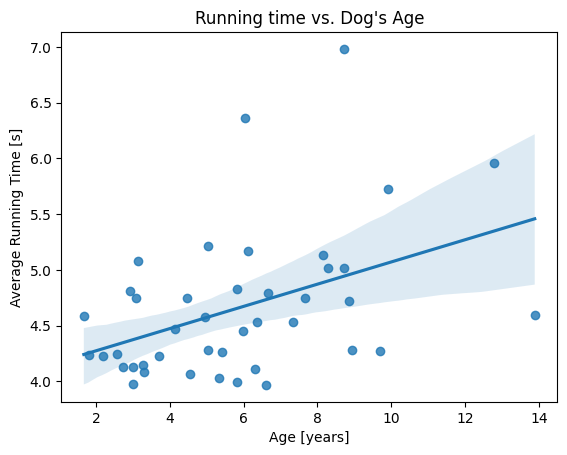

In [7]:
sns.regplot(data=df_dogs, x='age', y='avg_time')
plt.xlabel('Age [years]')
plt.ylabel('Average Running Time [s]')
plt.title("Running time vs. Dog's Age")
plt.show()


In [8]:
slope, intercept = np.polyfit(df_dogs['age'], df_dogs['avg_time'], 1)
print(f'Slope: {slope}, Intercept: {intercept}')

Slope: 0.0996469650209878, Intercept: 4.074748759026091


## Larger dogs run faster

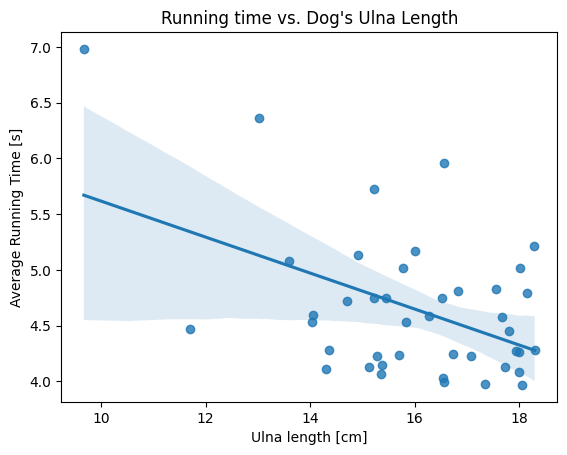

In [9]:
sns.regplot(data=df_dogs, x='ulna_length', y='avg_time')
plt.xlabel('Ulna length [cm]')
plt.ylabel('Average Running Time [s]')
plt.title("Running time vs. Dog's Ulna Length")
plt.show()


In [10]:
slope, intercept = np.polyfit(df_dogs['ulna_length'], df_dogs['avg_time'], 1)
print(f'Slope: {slope}, Intercept: {intercept}')

Slope: -0.16140764768423468, Intercept: 7.2313935985310005


<Axes: xlabel='age', ylabel='avg_start'>

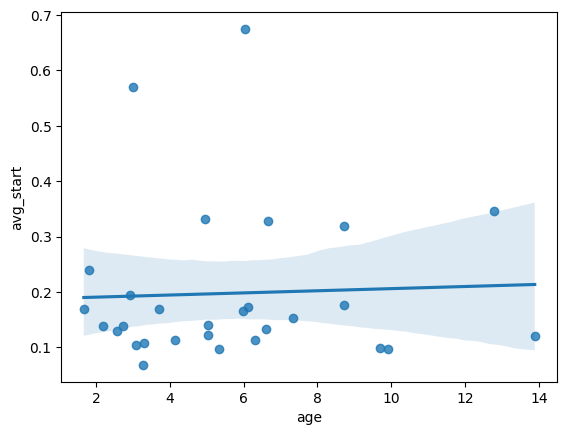

In [11]:
sns.regplot(data=df_dogs, x='age', y='avg_start')

<Axes: xlabel='ulna_length', ylabel='avg_start'>

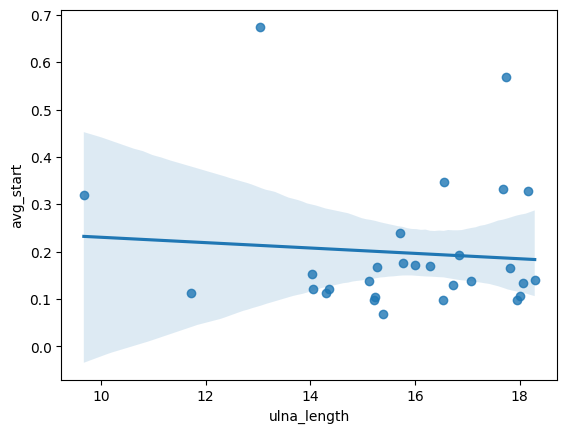

In [12]:
sns.regplot(data=df_dogs, x='ulna_length', y='avg_start')

<Axes: xlabel='age', ylabel='avg_change'>

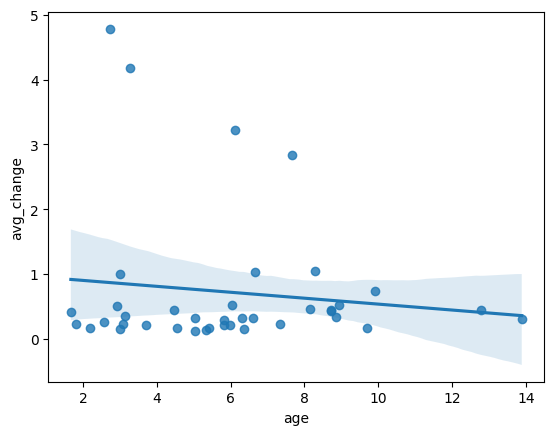

In [13]:
sns.regplot(data=df_dogs, x='age', y='avg_change')

<Axes: xlabel='ulna_length', ylabel='avg_change'>

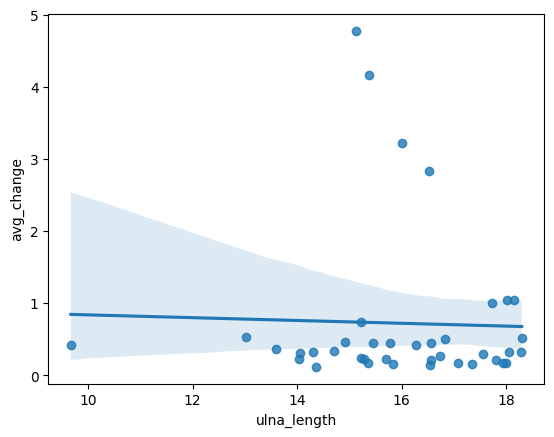

In [14]:
sns.regplot(data=df_dogs, x='ulna_length', y='avg_change')

<Axes: xlabel='age', ylabel='run_in_ratio'>

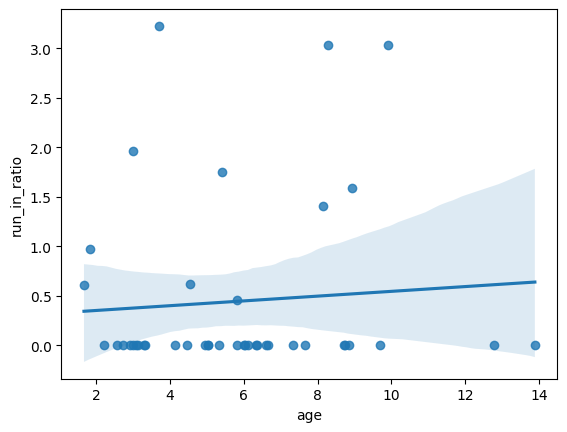

In [15]:
sns.regplot(data=df_dogs, x='age', y='run_in_ratio')

<Axes: xlabel='age', ylabel='run_outside_ratio'>

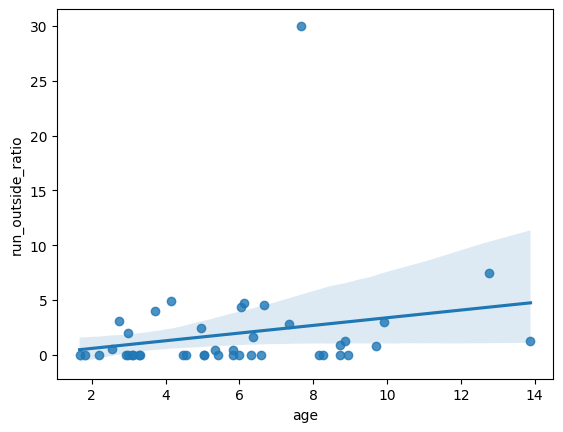

In [16]:
sns.regplot(data=df_dogs, x='age', y='run_outside_ratio')

<Axes: xlabel='ulna_length', ylabel='run_in_ratio'>

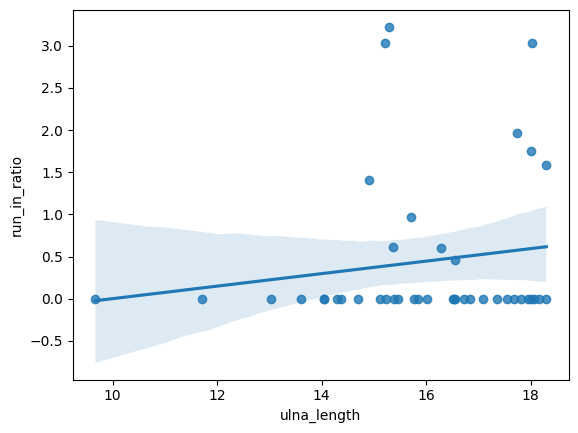

In [17]:
sns.regplot(data=df_dogs, x='ulna_length', y='run_in_ratio')

<Axes: xlabel='ulna_length', ylabel='run_outside_ratio'>

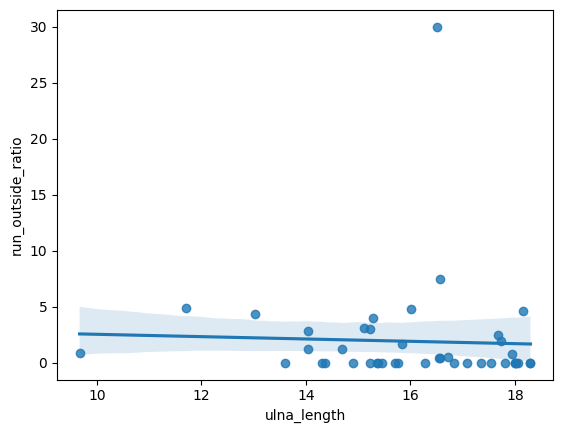

In [18]:
sns.regplot(data=df_dogs, x='ulna_length', y='run_outside_ratio')

## Not every border collies are good, but the best performing dogs, in terms of running time, start and change times, are usually border collies

On the other hand, border collies are highly overrepresented in the sample, so it is difficult to draw a clear conclusion in this case

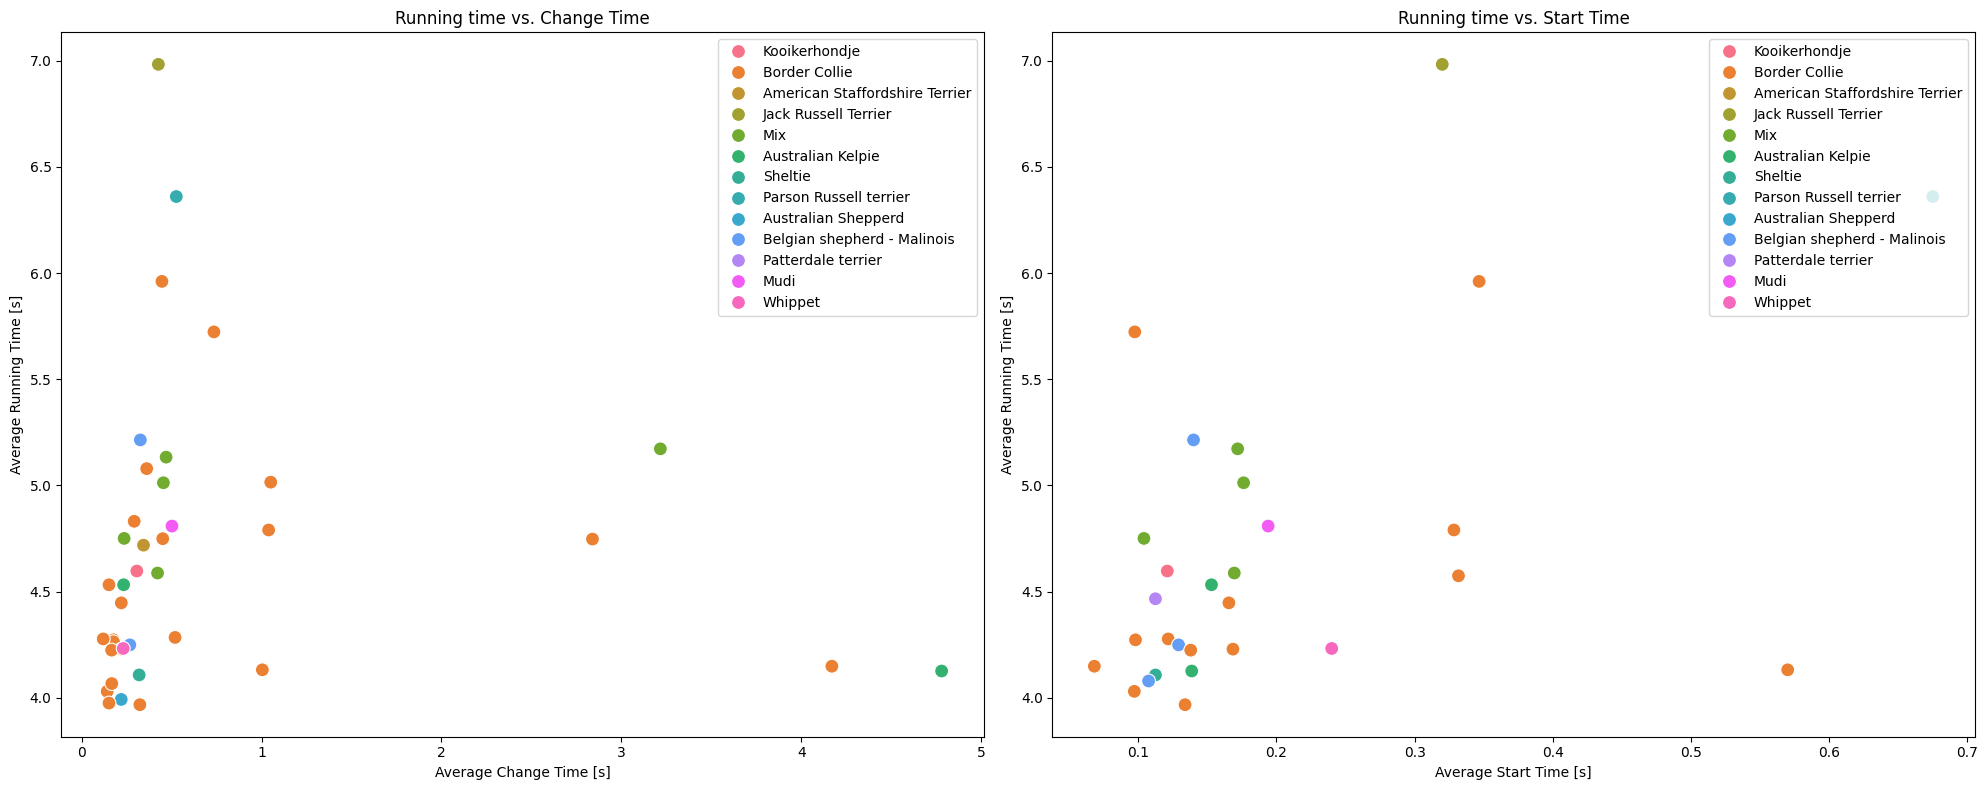

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=df_dogs, x='avg_change', y='avg_time', hue='breed', s=100, ax=axs[0])
axs[0].set_title("Running time vs. Change Time")
axs[0].set_ylabel('Average Running Time [s]')
axs[0].set_xlabel('Average Change Time [s]')
axs[0].legend(loc='upper right')

sns.scatterplot(data=df_dogs, x='avg_start', y='avg_time', hue='breed',s=100,  ax=axs[1])
axs[1].set_title("Running time vs. Start Time")
axs[1].set_ylabel('Average Running Time [s]')
axs[1].set_xlabel('Average Start Time [s]')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

## Start and Change performance

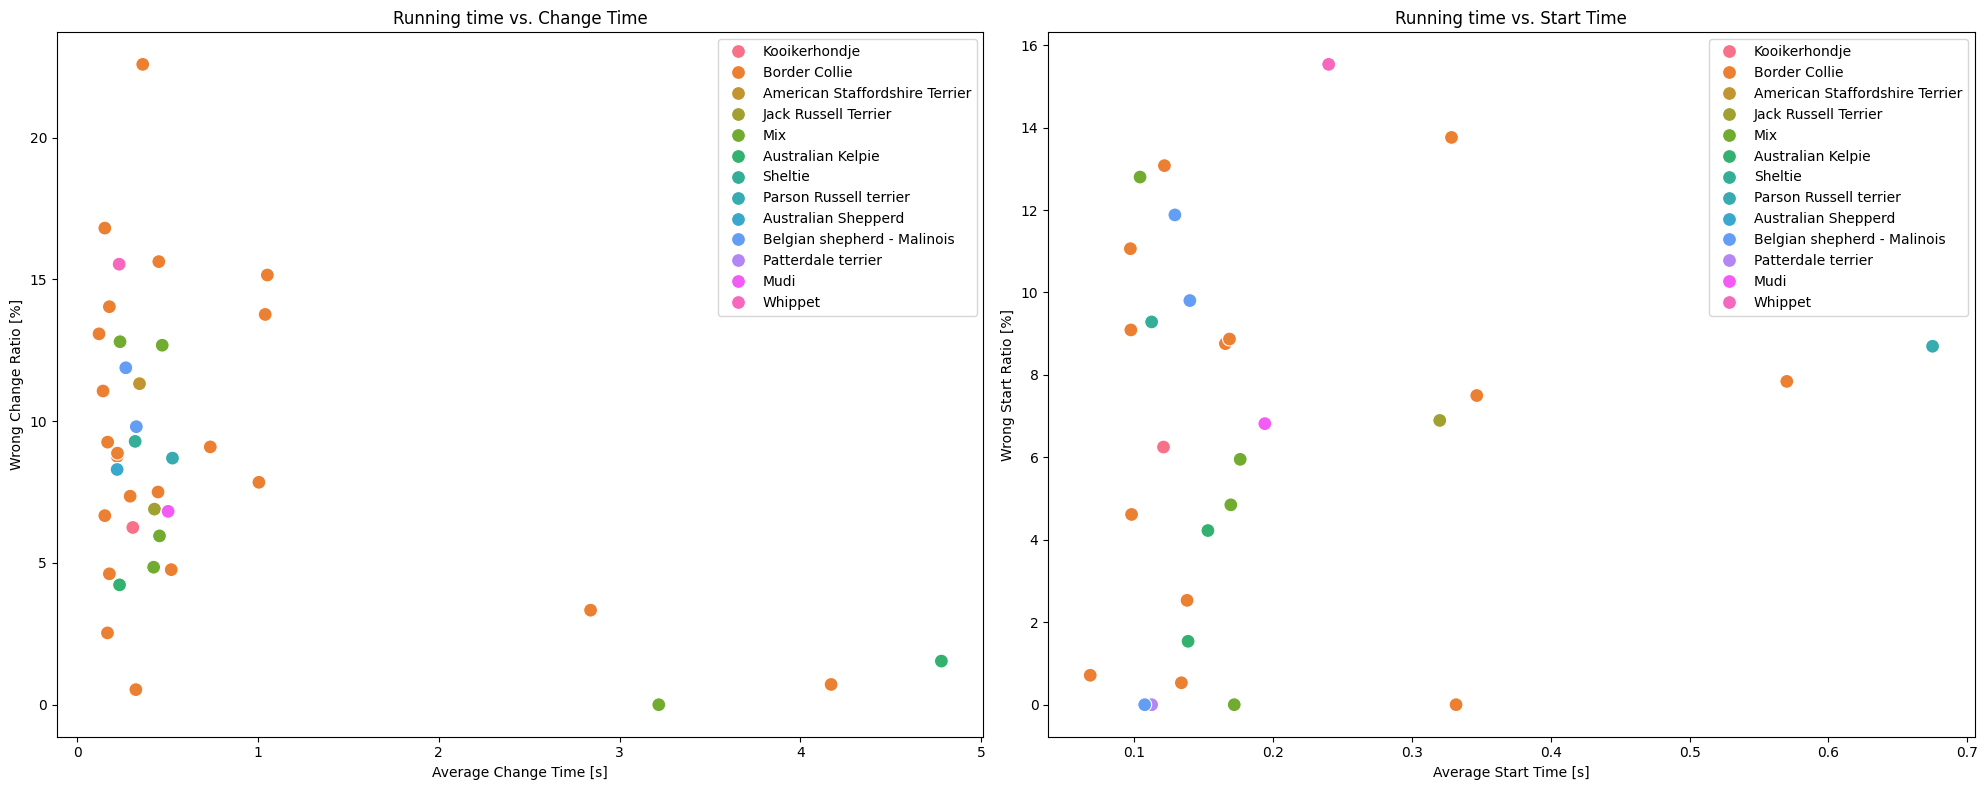

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=df_dogs, x='avg_change', y='wrong_change_ratio', hue='breed', s=100, ax=axs[0])
axs[0].set_title("Running time vs. Change Time")
axs[0].set_ylabel('Wrong Change Ratio [%]')
axs[0].set_xlabel('Average Change Time [s]')
axs[0].legend(loc='upper right')

sns.scatterplot(data=df_dogs, x='avg_start', y='wrong_change_ratio', hue='breed',s=100,  ax=axs[1])
axs[1].set_title("Running time vs. Start Time")
axs[1].set_ylabel('Wrong Start Ratio [%]')
axs[1].set_xlabel('Average Start Time [s]')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

## No correlation between change time and wrong change ratio and between start time and wrong start ratio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


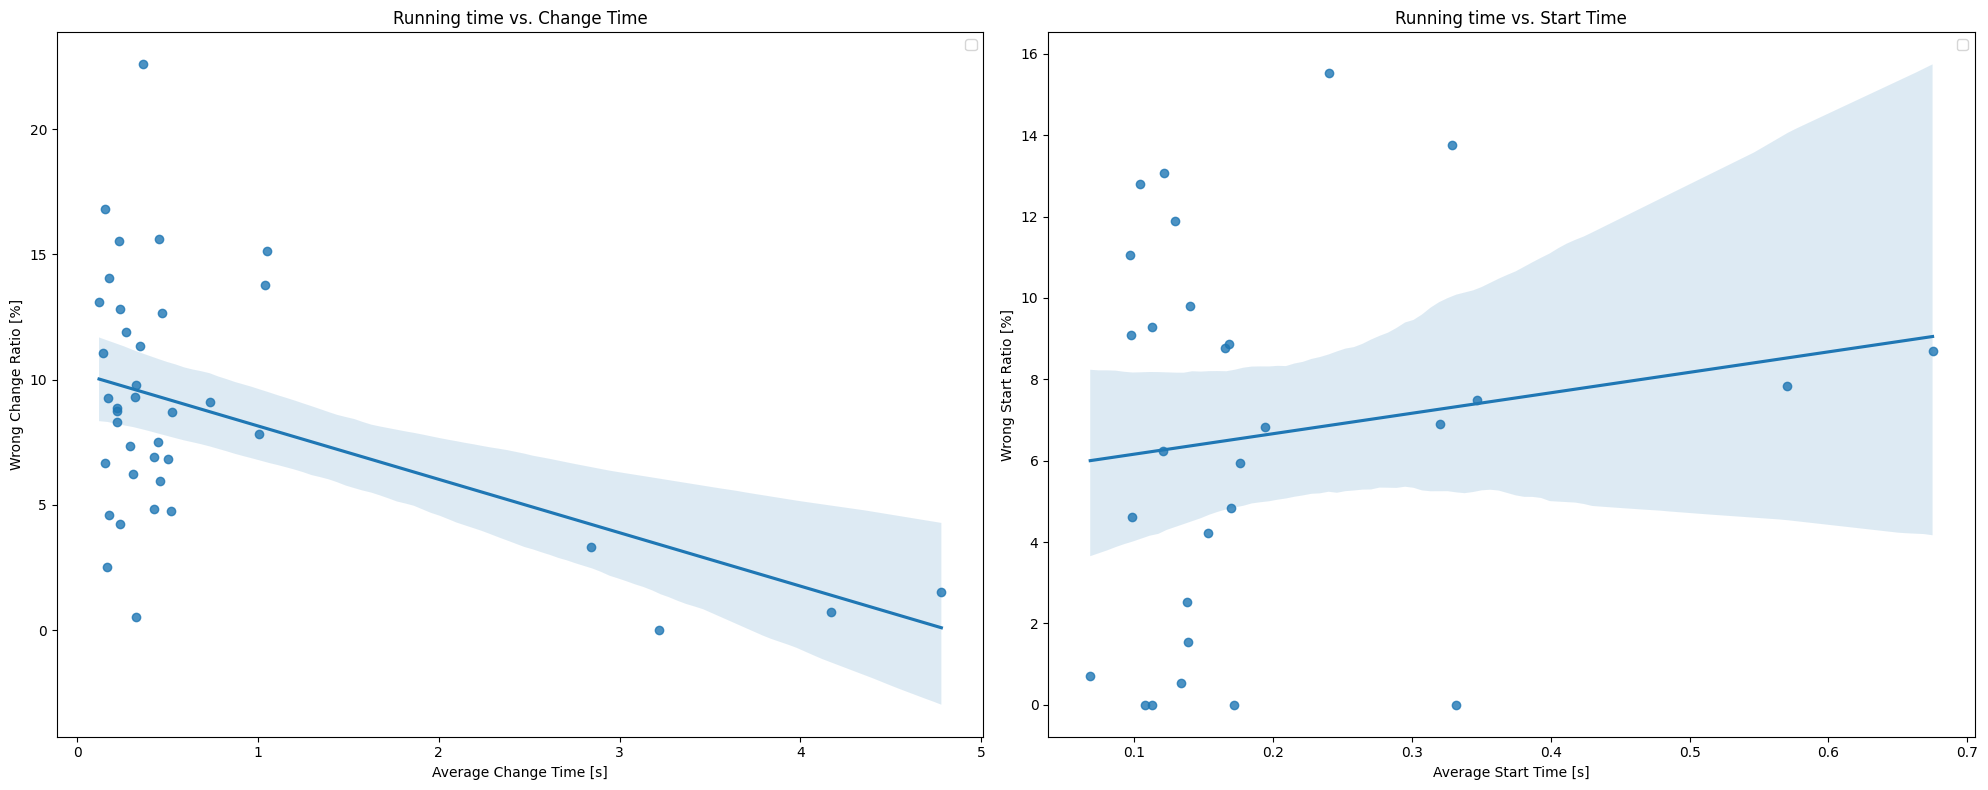

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.regplot(data=df_dogs, x='avg_change', y='wrong_change_ratio', ax=axs[0])
axs[0].set_title("Running time vs. Change Time")
axs[0].set_ylabel('Wrong Change Ratio [%]')
axs[0].set_xlabel('Average Change Time [s]')
axs[0].legend(loc='upper right')

sns.regplot(data=df_dogs, x='avg_start', y='wrong_change_ratio',  ax=axs[1])
axs[1].set_title("Running time vs. Start Time")
axs[1].set_ylabel('Wrong Start Ratio [%]')
axs[1].set_xlabel('Average Start Time [s]')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()